try to reproduce the miles 2018 paper figures:
- ratio: psd
- phase difference: cwt

figure out when to use disturbed electric filed, when to use measurement electric filed.

In [19]:
import pandas as pd

from pyaw import swarm, utils_spectral,utils_preprocess
from pyaw.swarm import Swarm

import importlib
importlib.reload(swarm)
importlib.reload(utils_spectral)
importlib.reload(utils_preprocess)

<module 'pyaw.utils_preprocess' from 'D:\\cleo\\master\\pyaw\\pyaw\\utils_preprocess.py'>

# file

In [20]:
fp_e = r"\\Diskstation1\file_three\aw\swarm\A\efi16\sw_efi16A_20160311T064000_20160311T070000_0.pkl"
fp_b = r"\\Diskstation1\file_three\aw\swarm\A\vfm50\sw_vfm50A_20160311T064000_20160311T070000_0.pkl"

# create swarm instances

In [21]:
swarm_e = Swarm(fp_e, 'efi16','20160311T064700','20160311T064900')
swarm_b = Swarm(fp_b, 'vfm50','20160311T064700','20160311T064900')

self.df['eh_sc1'] set nan:
30
datetime
2016-03-11 06:46:48.631750107    -43.973499
2016-03-11 06:46:52.006750107     55.851311
2016-03-11 06:46:52.381750107     96.951309
2016-03-11 06:46:56.756750107     31.929352
2016-03-11 06:47:02.381750107    -25.189461
2016-03-11 06:47:02.881750107    -52.246895
2016-03-11 06:47:05.193749905    -77.747688
2016-03-11 06:47:08.381750107     32.064510
2016-03-11 06:47:12.318749905    122.049973
2016-03-11 06:47:12.568749905     24.538439
2016-03-11 06:47:13.193749905    -50.420204
2016-03-11 06:47:17.381750107     27.311708
2016-03-11 06:47:18.756750107     25.957230
2016-03-11 06:47:20.443749905    -52.979156
2016-03-11 06:47:23.318749905    -57.540714
2016-03-11 06:47:24.131750107     24.142708
2016-03-11 06:47:24.318749905     25.899548
2016-03-11 06:47:25.443749905     90.709106
2016-03-11 06:47:31.818749905     35.128010
2016-03-11 06:47:32.193749905     71.152878
2016-03-11 06:47:32.506750107     56.372738
2016-03-11 06:47:47.443749905     31.

# choose the DataFrames of the instances

In [22]:
df_e = swarm_e.df.loc[pd.to_datetime('2016-03-11 06:47:00'):pd.to_datetime('2016-03-11 06:49:00')]
df_b = swarm_b.df.loc[pd.to_datetime('2016-03-11 06:47:00'):pd.to_datetime('2016-03-11 06:49:00')]

# plot

<Axes: xlabel='datetime'>

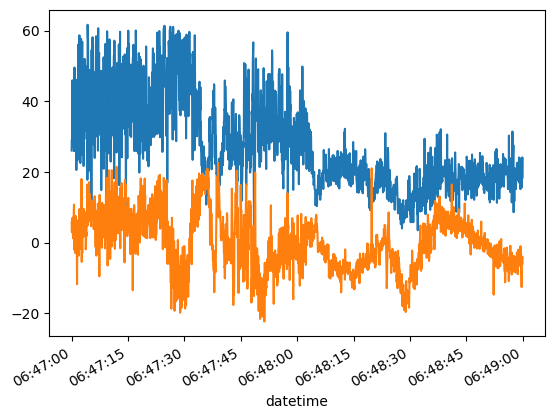

In [23]:
e1 = df_e['eh_enu1']
e2 = df_e['eh_enu2']
e1.plot()
e2.plot()

<Axes: xlabel='datetime'>

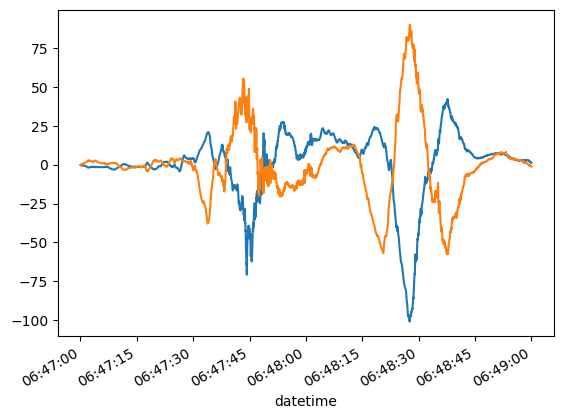

In [24]:
b2 = df_b['b1_enu2']
b1 = df_b['b1_enu1']
b2.plot()
b1.plot()

In [25]:
# (-df_b['b_enu3']).plot(),df_b['b_enu1'].plot(),df_b['b_enu2'].plot()

In [26]:
# from scipy.signal import firwin, lfilter, resample
# import numpy as np
#
# def process_signal(magnetic_signal, original_sampling_rate=50, target_sampling_rate=16):
#     # Step 1: Design FIR filter
#     cutoff_frequency = target_sampling_rate / 2  # Nyquist frequency
#     num_taps = 101
#     fir_filter = firwin(num_taps, cutoff_frequency, fs=original_sampling_rate)
#
#     # Step 2: Apply FIR filter
#     filtered_signal = lfilter(fir_filter, 1.0, magnetic_signal)
#
#     # # Step 3: Resample to target sampling rate
#     # num_samples = int(len(filtered_signal) * (target_sampling_rate / original_sampling_rate))
#     # resampled_signal = resample(filtered_signal, num_samples)
#     #
#     # return resampled_signal
#     return filtered_signal
#
# # 使用示例
# b_filter = pd.Series(data=process_signal(b.values),index=b.index)

In [27]:
# b.plot(),b_filter.plot()

In [28]:
low_filter = utils_preprocess.LHBFilter(b2,50,lowcut=8.0)
b2_filter_low = pd.Series(data=low_filter.apply_filter(),index=b2.index)

low_filter = utils_preprocess.LHBFilter(b1,50,lowcut=8.0)
b1_filter_low = pd.Series(data=low_filter.apply_filter(),index=b1.index)

(<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>)

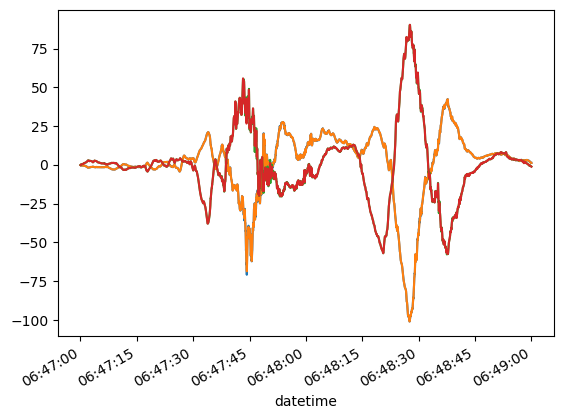

In [29]:
b2.plot(),b2_filter_low.plot()
b1.plot(),b1_filter_low.plot()

In [30]:
b2_align_low = utils_preprocess.align_high2low(b2_filter_low,e1)
b1_align_low = utils_preprocess.align_high2low(b1_filter_low,e2)

(<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>)

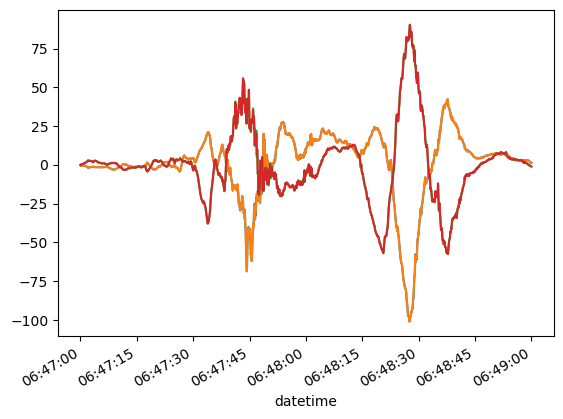

In [31]:
b2_filter_low.plot(),b2_align_low.plot()
b1_filter_low.plot(),b1_align_low.plot()

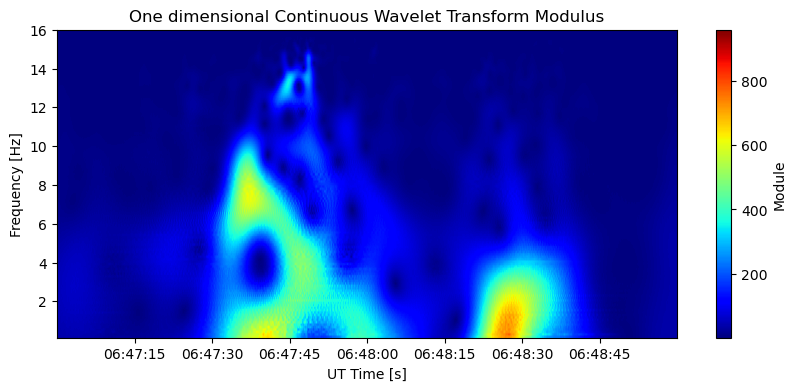

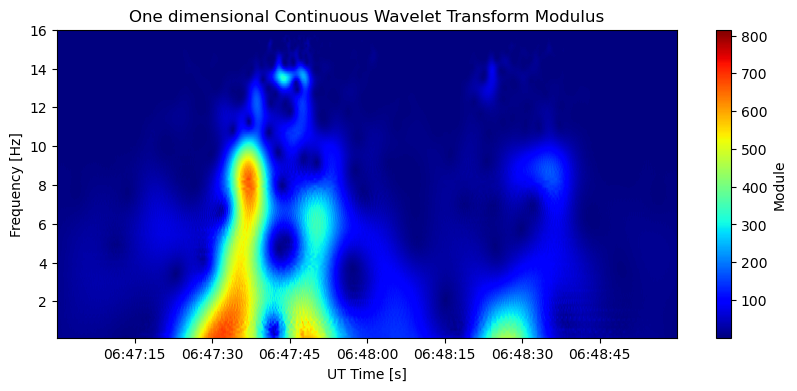

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [32]:
cwt12 = utils_spectral.CWT(e1, b2_align_low,sampling_period=1/16)
cwt21 = utils_spectral.CWT(e2, b1_align_low,sampling_period=1/16)
cwt12.plot_module()
cwt21.plot_module()

static

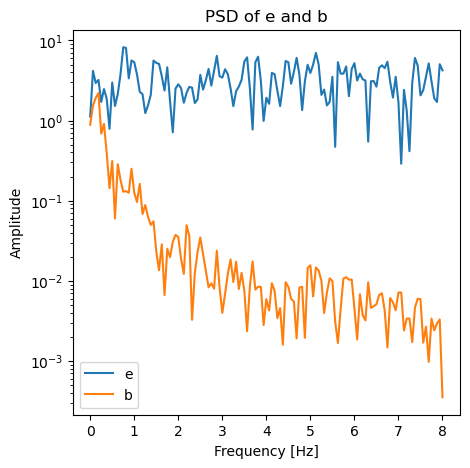

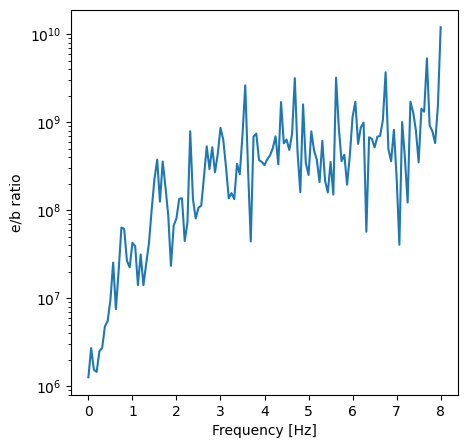

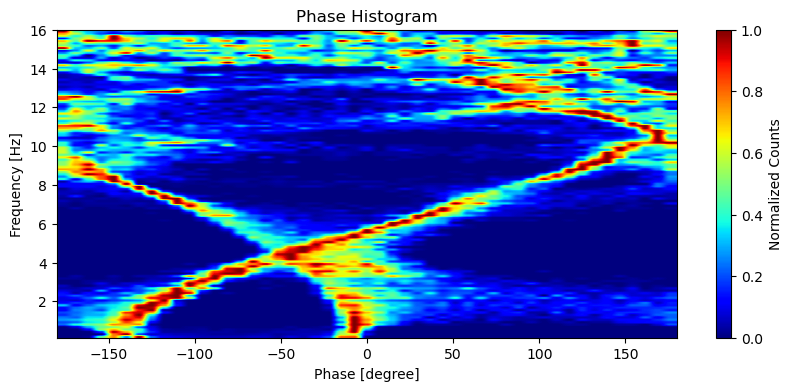

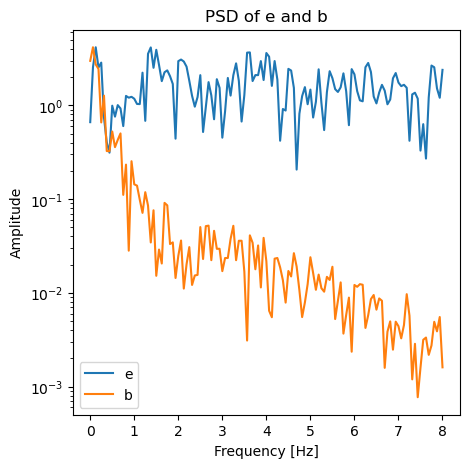

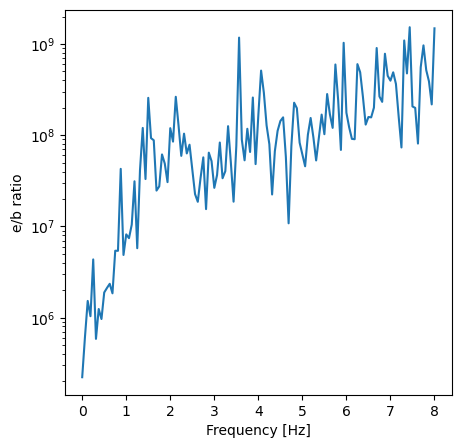

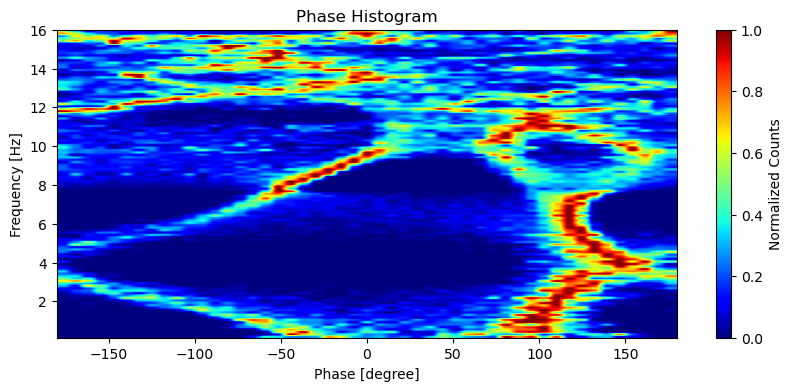

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [33]:
signal1 = e1
signal2 = b2_align_low
start = pd.to_datetime('20160311T064705')
end = pd.to_datetime('20160311T064725')
signal1 = signal1.loc[start:end]
signal2 = signal2.loc[start:end]
swarm.figure_psd(signal1, signal2, 16)
swarm.figure_ratio(signal1, signal2, 16)
cwt = utils_spectral.CWT(signal1, signal2,sampling_period=1/16)
cwt.plot_phase_hist_counts()

signal1 = e2
signal2 = b1_align_low
start = pd.to_datetime('20160311T064705')
end = pd.to_datetime('20160311T064725')
signal1 = signal1.loc[start:end]
signal2 = signal2.loc[start:end]
swarm.figure_psd(signal1, signal2, 16)
swarm.figure_ratio(signal1, signal2, 16)
cwt = utils_spectral.CWT(signal1, signal2,sampling_period=1/16)
cwt.plot_phase_hist_counts()

dynamic

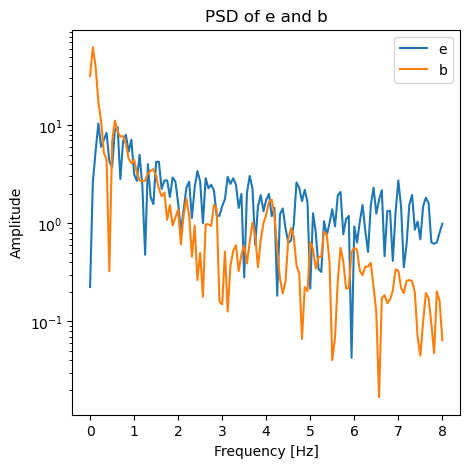

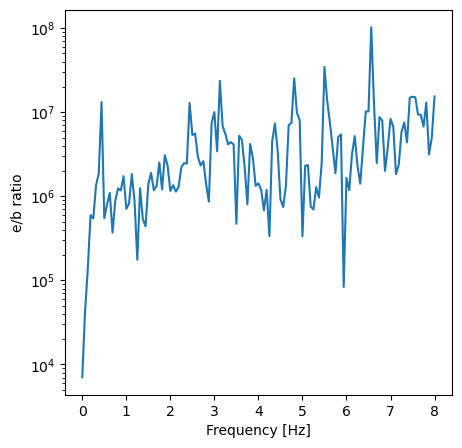

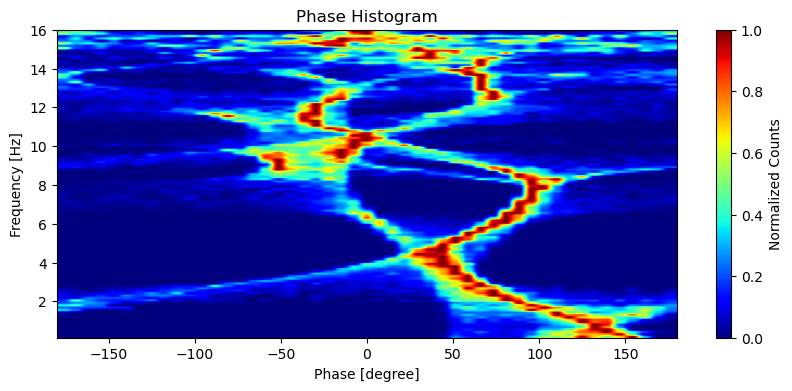

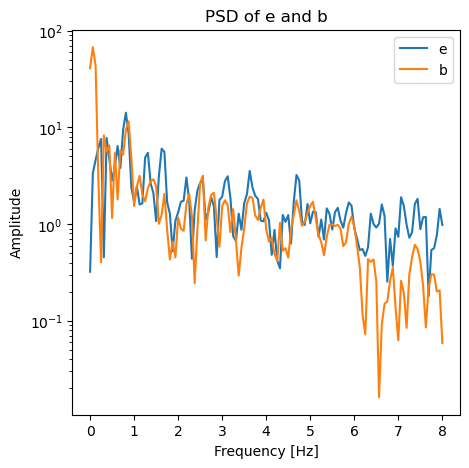

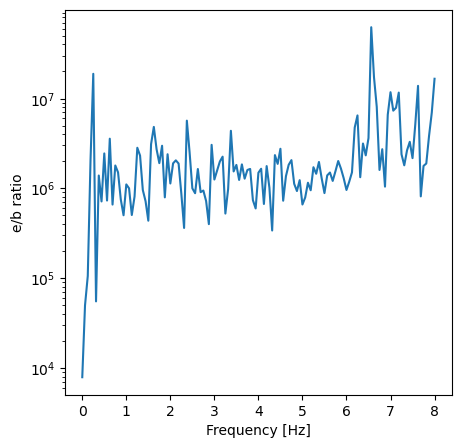

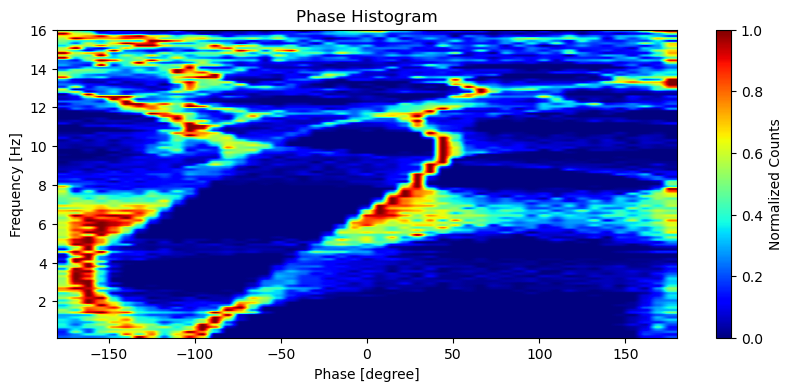

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [34]:
signal1 = e1
signal2 = b2_align_low
start = pd.to_datetime('20160311T064735')
end = pd.to_datetime('20160311T064755')
signal1 = signal1.loc[start:end]
signal2 = signal2.loc[start:end]
swarm.figure_psd(signal1, signal2, 16)
swarm.figure_ratio(signal1, signal2, 16)
cwt = utils_spectral.CWT(signal1, signal2,sampling_period=1/16)
cwt.plot_phase_hist_counts()

signal1 = e2
signal2 = b1_align_low
start = pd.to_datetime('20160311T064735')
end = pd.to_datetime('20160311T064755')
signal1 = signal1.loc[start:end]
signal2 = signal2.loc[start:end]
swarm.figure_psd(signal1, signal2, 16)
swarm.figure_ratio(signal1, signal2, 16)
cwt = utils_spectral.CWT(signal1, signal2,sampling_period=1/16)
cwt.plot_phase_hist_counts()

dynamic

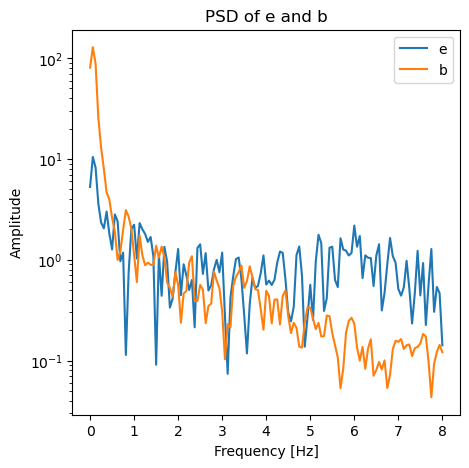

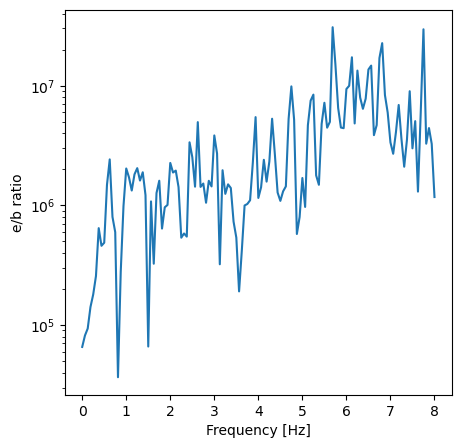

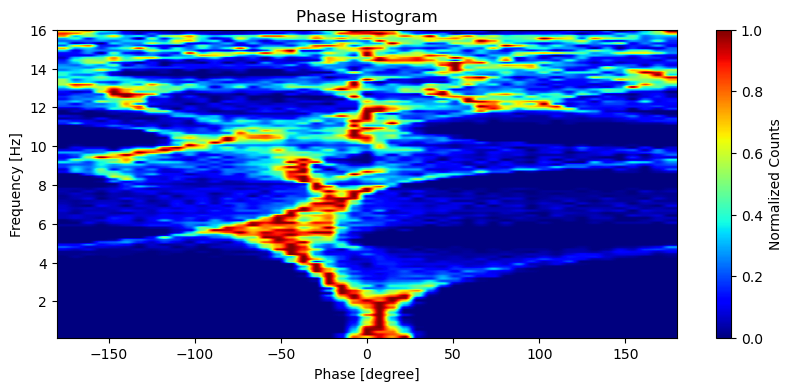

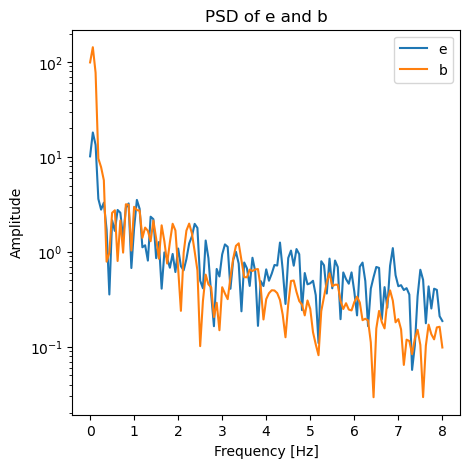

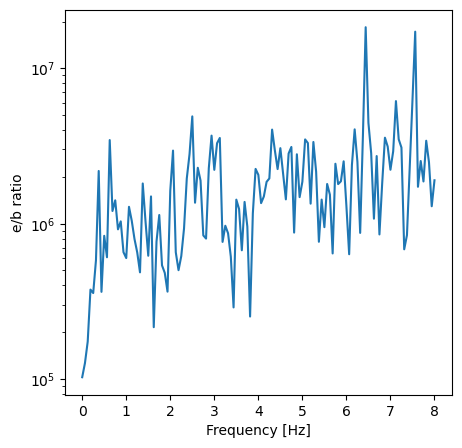

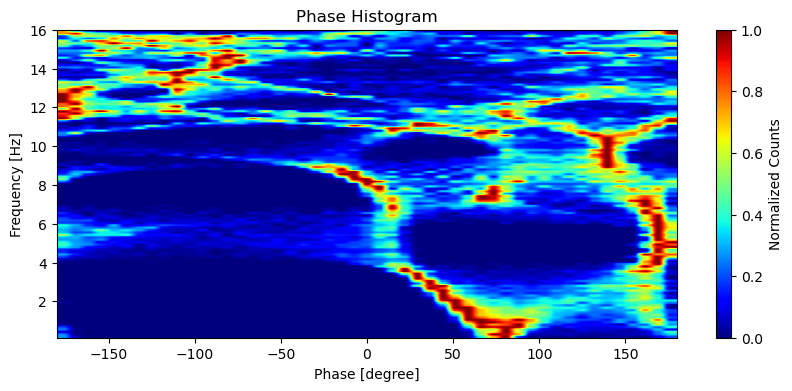

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [35]:
signal1 = e1
signal2 = b2_align_low
start = pd.to_datetime('20160311T064820')
end = pd.to_datetime('20160311T064840')
signal1 = signal1.loc[start:end]
signal2 = signal2.loc[start:end]
swarm.figure_psd(signal1, signal2, 16)
swarm.figure_ratio(signal1, signal2, 16)
cwt = utils_spectral.CWT(signal1, signal2,sampling_period=1/16)
cwt.plot_phase_hist_counts()

signal1 = e2
signal2 = b1_align_low
start = pd.to_datetime('20160311T064820')
end = pd.to_datetime('20160311T064840')
signal1 = signal1.loc[start:end]
signal2 = signal2.loc[start:end]
swarm.figure_psd(signal1, signal2, 16)
swarm.figure_ratio(signal1, signal2, 16)
cwt = utils_spectral.CWT(signal1, signal2,sampling_period=1/16)
cwt.plot_phase_hist_counts()